In [3]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
#Read xls File and Load to a dataframe

df = pd.read_excel('weather2015_2019(1).xlsx')
#print(df)
df = df.drop(columns = df.columns[13:])
df = df.drop(columns = df.columns[0:1])
df = df.dropna()
df

,Unnamed: 0,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
0,0,Clapp-Library,2015-01-01,00:00:00,1024.1,-8.777778,68.0,-13.611111,0.0,0.00000,157.5,1.78816
1,1,Clapp-Library,2015-01-01,00:30:00,1028.0,-6.555556,49.0,-15.500000,0.0,2.23520,270.0,8.04672
2,2,Clapp-Library,2015-01-01,01:00:00,1028.2,-6.833333,50.0,-15.555556,0.0,1.78816,247.5,6.25856
3,3,Clapp-Library,2015-01-01,01:30:00,1029.3,-7.222222,52.0,-15.444444,0.0,3.12928,225.0,6.70560
4,4,Clapp-Library,2015-01-01,02:00:00,1029.5,-7.000000,53.0,-15.000000,0.0,4.02336,225.0,7.59968
...,...,...,...,...,...,...,...,...,...,...,...,...
97031,9329,Clapp-Library,2020-07-13,08:30:00,1011.1,23.222222,84.0,20.388889,0.0,0.44704,135.0,1.78816
97032,9330,Clapp-Library,2020-07-13,09:00:00,1011.0,24.611111,76.0,20.111111,0.0,0.00000,135.0,1.34112
97033,9331,Clapp-Library,2020-07-13,09:30:00,1011.1,24.888889,74.0,19.944444,0.0,0.44704,135.0,2.23520
97034,9332,Clapp-Library,2020-07-13,10:00:00,1011.0,26.444444,70.0,20.555556,0.0,0.00000,202.5,1.34112


In [5]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)

#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)

In [6]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2016

,Unnamed: 0,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
20400,2880,Clapp-Library,2016-03-01,00:00:00,1013.6,5.166667,64.0,-1.111111,0.0,2.68224,180.0,7.15264
20401,2881,Clapp-Library,2016-03-01,00:30:00,1014.4,5.722222,60.0,-1.444444,0.0,2.23520,180.0,8.04672
20402,2882,Clapp-Library,2016-03-01,01:00:00,1016.6,5.888889,60.0,-1.277778,0.0,4.91744,270.0,14.75232
20403,2883,Clapp-Library,2016-03-01,01:30:00,1017.9,3.944444,59.0,-3.333333,0.0,6.25856,270.0,16.54048
20404,2884,Clapp-Library,2016-03-01,02:00:00,1018.8,2.666667,59.0,-4.555556,0.0,6.70560,270.0,17.88160
...,...,...,...,...,...,...,...,...,...,...,...,...
23323,5803,Clapp-Library,2016-04-30,21:30:00,1027.1,11.166667,55.0,2.444444,0.0,4.02336,157.5,10.72896
23324,5804,Clapp-Library,2016-04-30,22:00:00,1027.2,9.944444,57.0,1.833333,0.0,5.36448,157.5,9.83488
23325,5805,Clapp-Library,2016-04-30,22:30:00,1027.5,9.444444,58.0,1.611111,0.0,4.02336,157.5,8.49376
23326,5806,Clapp-Library,2016-04-30,23:00:00,1027.4,9.055556,58.0,1.222222,0.0,2.68224,180.0,8.49376


### Case 1 - 'Data'

0.06338124964051517
43.74588990880665


Text(0, 0.5, 'Air Temp (°C)')

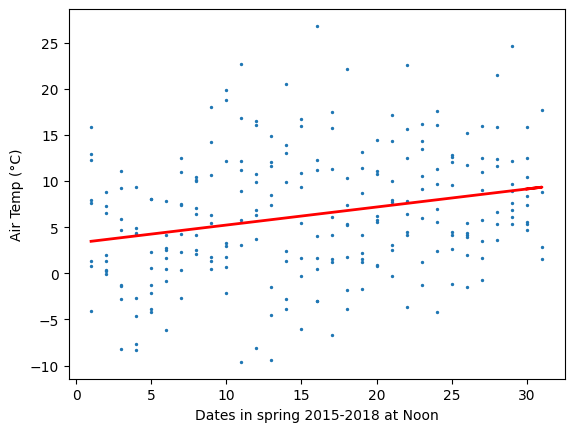

In [7]:
#Separate specific time
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

#change dates to remove year
#print(df15_19_noon)

#Plot dates by temps for 2015
date15_18_noon = df15_18_noon['Date']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

#print(date15_19_noon)
date15_18_noon = date15_18_noon.astype(str)
date15_18_noon = date15_18_noon.str.split("-").str[-1].astype(int)

date15_18_noon = date15_18_noon.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_18_noon,temp15_18_noon)
temp15_18_noon_pred = model.predict(date15_18_noon)

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

#draw scatter plot
plt.scatter(date15_18_noon,temp15_18_noon, s=2)
plt.plot(date15_18_noon, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")


0.1415959609862275
31.683961052686


Text(0, 0.5, 'Air Temp (°C)')

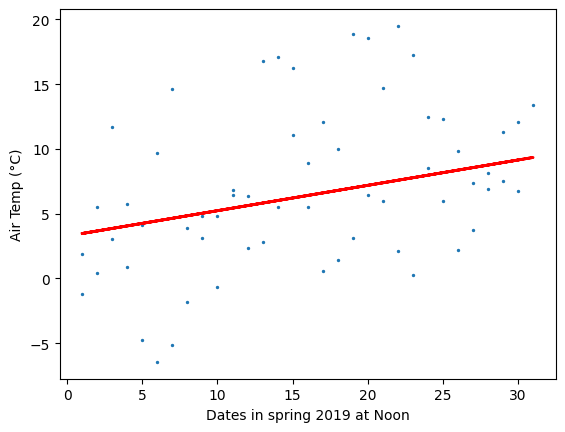

In [8]:
##Plot dates by temps for 2020

df2019_noon = df2019[df2019["Time"]== '12:00:00']
date2019_noon = df2019_noon['Date']
temp2019_noon = df2019_noon['Air Temp (°C)']

date2019_noon = date2019_noon.astype(str)
date2019_noon = date2019_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date2019_noon = date2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)

# predict 2020 air temperature at noon
temp2019_noon_pred = model.predict(date2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

# draw scatter plot
plt.scatter(date2019_noon,temp2019_noon, s=2)
plt.plot(date2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")

### Case 2 - 'Barometric Pressure (mbar)'

0.008445640430280066
46.31172271074639


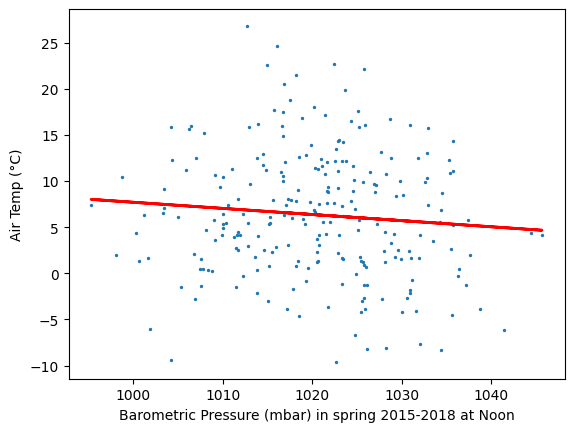

In [9]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pressure15_18 = df15_18_noon[['Barometric Pressure (mbar)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
pressure15_18 = pressure15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pressure15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pressure15_18)

plt.scatter(pressure15_18,temp15_18_noon, s=2)
plt.plot(pressure15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

0.04551914859283557
35.23018619095053


(array([ 990., 1000., 1010., 1020., 1030., 1040., 1050.]),
 [Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030'),
  Text(1040.0, 0, '1040'),
  Text(1050.0, 0, '1050')])

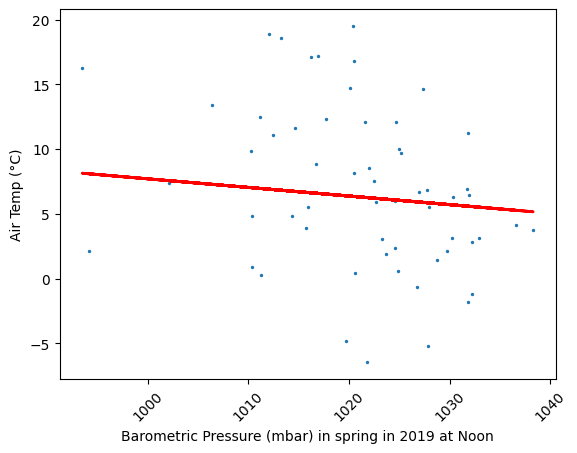

In [10]:

df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon['Barometric Pressure (mbar)']
temp2019_noon = df2019_noon['Air Temp (°C)']

pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3 - Gust Speed and air temp


0.02355525392947566
45.60601028672462


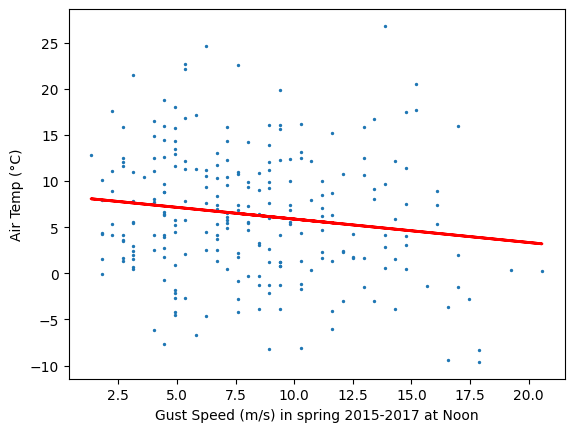

In [11]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

gSpeed15_18 = df15_18_noon[['Gust Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_18 = gSpeed15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(gSpeed15_18)

plt.scatter(gSpeed15_18,temp15_18_noon, s=2)
plt.plot(gSpeed15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

-0.0004332664451944801
36.92630417522117


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

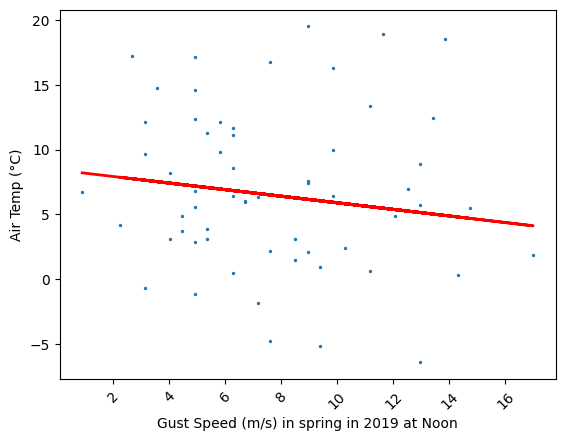

In [12]:

df2019_noon = df2019[df2019["Time"]== '12:00:00']
gSpeed2019_noon = df2019_noon['Gust Speed (m/s)']
temp2019_noon = df2019_noon['Air Temp (°C)']

gSpeed2019_noon = gSpeed2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(gSpeed2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(gSpeed2019_noon, temp2019_noon, s = 2)
plt.plot(gSpeed2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 - Barometric Pressure (mbar),Gust Speed (m/s) and Air Temp

In [13]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre_sp15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre_sp15_18 = pre_sp15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre_sp15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre_sp15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)



0.04138642949670557
44.773184077544784


In [14]:
##Plot dates by temps for 2020

df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre_gs2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

pre_gs2019_noon = pre_gs2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre_gs2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)



0.08263131679064939
33.86036447726053


### Case 5 - Wind Speed (m/s)

0.03018849670796031
45.29619681329736


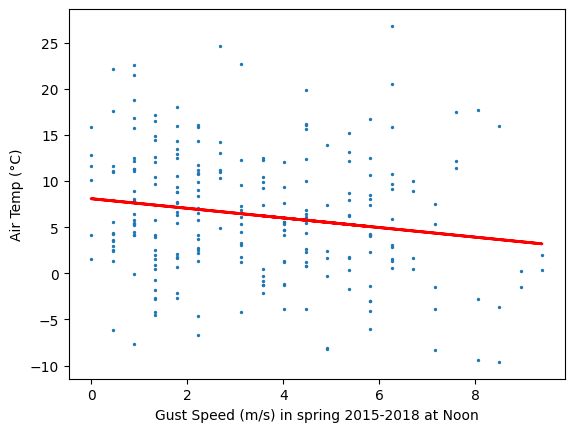

In [15]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

wSpeed15_18 = df15_18_noon[['Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
wSpeed15_18 = wSpeed15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(wSpeed15_18 ,temp15_18_noon)
temp15_18_noon_pred = model.predict(wSpeed15_18 )

plt.scatter(wSpeed15_18 ,temp15_18_noon, s=2)
plt.plot(wSpeed15_18 , temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

-0.024069855783821037
37.798738066473355


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

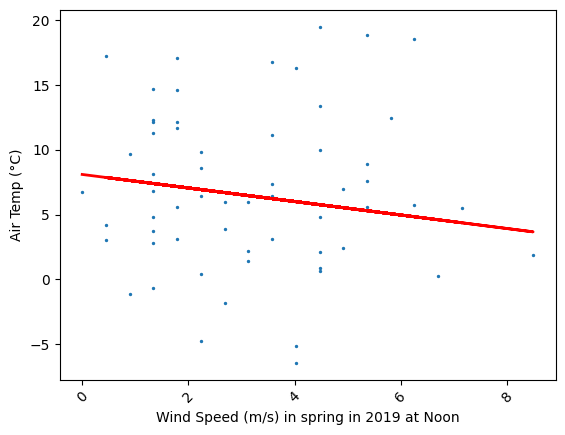

In [16]:

df2019_noon = df2019[df2019["Time"]== '12:00:00']
wSpeed2019_noon = df2019_noon['Wind Speed (m/s)']
temp2019_noon = df2019_noon['Air Temp (°C)']

wSpeed2019_noon = wSpeed2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(wSpeed2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(wSpeed2019_noon, temp2019_noon, s = 2)
plt.plot(wSpeed2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Wind Speed (m/s) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 - 'Wind Speed (m/s)','Barometric Pressure (mbar)'

In [17]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre_ws15_18 = df15_18_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre_ws15_18 = pre_ws15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre_ws15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre_ws15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.049440007280618925
44.39703217265087


In [18]:
##Plot dates by temps for 2019

df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre_ws2019_noon = df2019_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

pre_ws2019_noon = pre_ws2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre_ws2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.0581483126607617
34.76403980268811


### Case 8
##### x: 'Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)'\n
##### y: 'Air Temp (°C)'

In [19]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre_sg_ws15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre_sg_ws15_18 = pre_sg_ws15_18.to_numpy().reshape(-1,3)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre_sg_ws15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre_sg_ws15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.050635415008539075
44.34119923652647


In [20]:
##Plot dates by temps for 2020

df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre_gs_ws2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre_gs_ws2019_noon = pre_gs_ws2019_noon.to_numpy().reshape(-1,3)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre_gs_ws2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.042269285501597365
35.35013965217569


### Case 6
##### x: 'RH (%)'
##### y: 'Air Temp (°C)'

0.00014495424339910912
46.69941610676209


Text(0, 0.5, 'Air Temp (°C)')

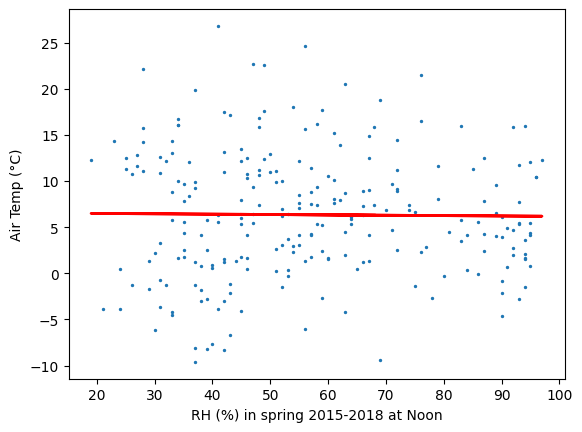

In [21]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

rh15_18 = df15_18_noon['RH (%)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
rh15_18 = rh15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(rh15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(rh15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)
plt.scatter(rh15_18, temp15_18_noon, s = 2)
plt.plot(rh15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("RH (%) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")


-0.0171928208008143
37.54490455840892


(array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

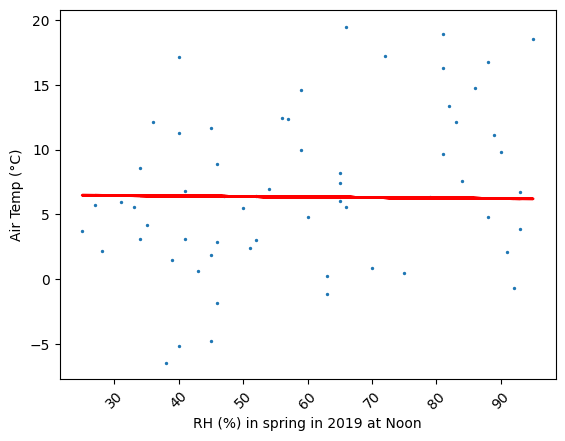

In [22]:
##Plot dates by temps for 2020
df2019_noon = df2019[df2019["Time"]== '12:00:00']
rh2019_noon = df2019_noon['RH (%)']
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
rh2019_noon = rh2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(rh2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

plt.scatter(rh2019_noon, temp2019_noon, s = 2)
plt.plot(rh2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("RH (%) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 -Dew Point (°C)

0.5974434111352676
18.801883062646713


Text(0, 0.5, 'Air Temp (°C)')

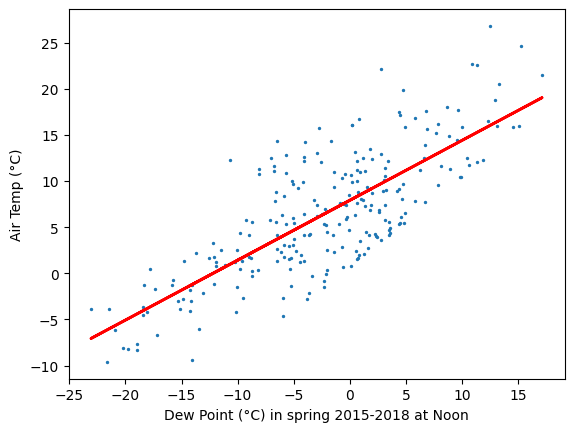

In [23]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

dp15_18 = df15_18_noon['Dew Point (°C)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
dp15_18 = dp15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dp15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(dp15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp15_18, temp15_18_noon, s = 2)
plt.plot(dp15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

0.7067541632953123
10.82379537692806


(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(-25.0, 0, '−25'),
  Text(-20.0, 0, '−20'),
  Text(-15.0, 0, '−15'),
  Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20')])

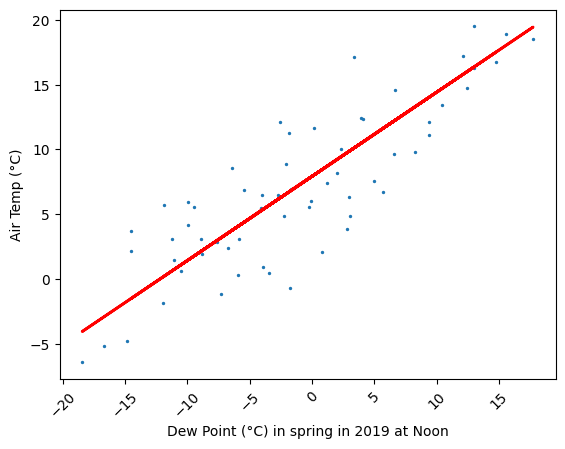

In [24]:
##Plot dates by temps for 2019
df2019_noon = df2019[df2019["Time"]== '12:00:00']
dp2019_noon = df2019_noon['Dew Point (°C)']
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
dp2019_noon = dp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(dp2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp2019_noon, temp2019_noon, s = 2)
plt.plot(dp2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring in 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)